## Module Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def hashfunc(arr):
    '''
    A hash function for aid in checking if an array in present in an array of arrays
    
    Input: array
    Returns string (hashed input)
    '''
    return str(hash(tuple(arr)))

In [3]:
def gen_states(arr):
    '''
    A function to generate children states (by swapping)
    
    Input: array (state)
    Returns an array of children arrays (states) 
    '''
    l = len(arr)
    res = []
    
    for idx in range(l-1):
        arrtemp = arr.copy()
        arrtemp[idx], arrtemp[idx+1] = arrtemp[idx+1], arrtemp[idx]
        res.append(arrtemp)
        
    return res

In [4]:
def check_sorted(arr):
    '''
    Input: array
    Returns whether an array is sorted or not
    '''
    for each in range(len(arr)-1):
        if arr[each] > arr[each+1]:
            return False
    return True

In [5]:
def cost(state):
    '''
    Input: array (state)
    Returns cost of edge of the state graph
    (which is 1 in this case for all the edges)
    '''
    return 1

In [6]:
def show_path(arr):
    '''
    Input: array (list of states)
    Prints the path using the input list
    '''
    path = ' => '.join(list(map(str, arr)))    
    print(path)

---
## Part-A
---

In [7]:
def bfs(state, printf=False):
    '''
    Breadth First Search
    '''
    visited = []
    queue = []
    queue.append(state)
    
    path = []
    
    while len(queue) != 0:
        front = queue[0]
        
        if hashfunc(front) in visited:
            queue.pop(0)
            continue
        
        if printf:
            print(front, hashfunc(front))
        path.append(front)
        
        visited.append(hashfunc(front))
        queue.pop(0)
        
        if check_sorted(front):
            return path
        
        children = gen_states(front)
            
        for each in children:
            if hashfunc(each) not in visited:
                queue.append(each)
    

In [8]:
def dfs(state, printf=False):
    '''
    Depth First Search
    '''
    visited = []
    stack = []
    stack.append(state)
    
    path = []
    
    while(len(stack) != 0):
        top = stack[-1]
        
        if hashfunc(top) in visited:
            stack.pop()
            continue
        
        if printf:
            print(top)
        path.append(top)
        
        visited.append(hashfunc(top))
        stack.pop()
        
        if check_sorted(top):
            return path
        
        children = gen_states(top)
            
        for each in children:
            if hashfunc(each) not in visited:
                stack.append(each)
    

In [9]:
def itdp(state, depth=1):
    '''
    Helper function for iterative deepening
    '''
    visited = []
    stack = []
    stack.append(state)
    
    depthstack = []
    depthstack.append(1)
    
    path = []
    
    while(len(stack) != 0):
        top = stack[-1]
        
        if hashfunc(top) in visited:
            stack.pop()
            continue
        
        # print(top)
        path.append(top)
        
        visited.append(hashfunc(top))
        stack.pop()
        
        currdepth = depthstack[-1]
        depthstack.pop()
        
        if check_sorted(top):
            return path, path
        
        children = gen_states(top)
            
        for each in children:
            if hashfunc(each) not in visited and currdepth+1 <= depth:
                stack.append(each)
                depthstack.append(currdepth+1)
    
    return -1, path
    

In [10]:
def iter_deepening(state):
    '''
    Iterative Deepening
    '''
    depth = 1
    numstates = 0
    
    path = []
    
    while True:
        for each in itdp(state, depth)[1]:
            path.append(each)
        if itdp(state, depth)[0] == -1:
            path.append('(no solution, depth increased)')
        else:
            break
        depth += 1

    return path, depth


In [11]:
def ucs(state, tabs=True, printf=False):
    '''
    Uniform Cost Search
    '''
    visited = []
    pqueue = []
    pqueue.append([state, 0])
    
    path = []
    
    while(len(pqueue) != 0):
        front = pqueue[0]
        currstate, cumcost = front
        
        if hashfunc(currstate) in visited:
            pqueue.pop(0)
            continue
        
        pqueue.pop(0)        
        visited.append(hashfunc(currstate))
        
        if printf:
            if tabs:
                print('\t', end='')
            print(f'state: {currstate}, cumulative cost: {cumcost}')
        path.append(currstate)
        
        if check_sorted(currstate):
            return path
        
        children = gen_states(currstate)
            
        for each in children:
            if hashfunc(each) not in visited:
                pqueue.append([each, cumcost+cost(each)])
                
        pqueue.sort(key=lambda x: x[0])
        pqueue.sort(key=lambda x: x[1])
    

In [12]:
def gr_as_heuristicfunc(state):
    '''
    Heuristic function for Greedy Search and A* search
    '''
    h = 0
    
    # goalstate = sorted(state)
    # for i in range(len(state)):
    #     if state[i] != goalstate[i]:
    #         h += 1
    # return h
    
    for i in range(len(state)):
        for j in range(i):
            if state[i] < state[j]:
                h += 1     
    return h


In [13]:
def greedy_search(state, tabs=True, printf=False):
    '''
    Greedy Search (Best First Search)
    '''
    visited = []
    pqueue = []
    pqueue.append([state, gr_as_heuristicfunc(state)])
    
    path = []
    
    while(len(pqueue) != 0):
        front = pqueue[0]
        
        currstate, hcost = front
        
        if hashfunc(currstate) in visited:
            pqueue.pop(0)
            continue
        
        pqueue.pop(0)
        visited.append(hashfunc(currstate))
        
        if printf:
            if tabs:
                print('\t', end='')
            print(f'state: {currstate}, heuristic: {hcost}')
        path.append(currstate)
        
        if check_sorted(currstate):
            return path
        
        children = gen_states(currstate)
            
        for each in children:
            if hashfunc(each) not in visited:
                pqueue.append([each, gr_as_heuristicfunc(each)])
        
        pqueue.sort(key=lambda x: x[0])
        pqueue.sort(key=lambda x: x[1])
    

In [14]:
def a_star_search(state, tabs=True, printf=False):
    '''
    A* Search
    '''
    visited = []
    pqueue = []
    pqueue.append([state, 0, gr_as_heuristicfunc(state) + 0])
    
    path = []
    
    while(len(pqueue) != 0):
        front = pqueue[0].copy()
        currstate, cumcost, fcost = front
        
        if hashfunc(currstate) in visited:
            pqueue.pop(0)
            continue
        
        pqueue.pop(0)
        visited.append(hashfunc(currstate))
        
        if printf:
            if tabs:
                print('\t', end='')
            print(f'state: {currstate}, (heuristic + cumulative cost): {fcost}')
        path.append(currstate)
        
        if check_sorted(currstate):
            return path
        
        children = gen_states(currstate)
            
        for each in children:
            if hashfunc(each) not in visited:
                pqueue.append([each, cumcost + cost(each), gr_as_heuristicfunc(each) + cumcost + cost(each)])
                
        pqueue.sort(key=lambda x: x[0])
        pqueue.sort(key=lambda x: x[2])


In [15]:
def hc_heuristicfunc(state):
    '''
    Heuristic function for Hill Climbing Search
    '''
    h = 0
    
    # for i in range(len(state)):
    #     for j in range(i):
    #         if state[i] < state[j]:
    #             h += 1
    # return h
    
    for each in range(len(state)-1):
        if state[each] > state[each+1]:
            h += 1
    return h


In [16]:
def hill_climbing_search(state, visited=[], printf=False):
    '''
    Hill Climbing Search
    '''
    if printf:
        print(state, hashfunc(state))
    if check_sorted(state):
        return state
    visited.append(hashfunc(state))
    
    children = gen_states(state)
    finalchildren = []
    for each in children:
            if hashfunc(each) not in visited:
                finalchildren.append(each)
                
    if len(finalchildren) == 0:
        return state
                
    hlist = list(map(hc_heuristicfunc, finalchildren))
    bestchild = finalchildren[hlist.index(min(hlist))]
    
    if hc_heuristicfunc(bestchild) > hc_heuristicfunc(state):
        return state
    
    return hill_climbing_search(bestchild, visited)
    

---
## Part-B
---

In [17]:
def make_start_state(n):
    '''
    Input: number of elements required in a state (integer)
    Returns an array containing n float values (upto 1 decimal place) in the range (-10, 10)
    '''
    start_state = list(map(lambda x: round(x, 1), np.random.uniform(size=n, low=-10, high=10)))
    return start_state

In [18]:
algos = [bfs, dfs, iter_deepening, ucs, greedy_search, a_star_search, hill_climbing_search]
algonames = ['Breadth First Search', 'Depth First Search', 'Iterative Deepening', 'Uniform Cost Search',
             'Greedy Search (Best First Search)', 'A* Search', 'Hill Climbing Search']

In [19]:
num_iters = 20

In [20]:
def run_algo(n=None, num_iters=20, custom_input=None):
    '''
    Inputs:
        n (number of elements, for generating random state),
        no. of iterations,
        optional (in case of giving own state)
        
    Runs all the search algorithms based on the input for the specified no. of iterations
    Returns a dictionary containing the sum of total nodes covered for each algorithm for all the iterations
    '''
    algodict = {}
    for each in algonames:
        if each not in algodict:
            algodict[each] = 0
    
    if custom_input:
        n = len(custom_input)
        num_iters = 1
    
    for itr in range(1, num_iters+1):
        if custom_input:
            startstate = custom_input
        else:
            startstate = make_start_state(n)
        print(f'Iteration: {itr}')
        print(f'Start State: {startstate}')
        print('-'*50)
        for each in range(len(algos)):
            algo, algoname = algos[each], algonames[each]

            print(f'\t{algoname}:')
            if algoname == 'Iterative Deepening':
                path, depth = algo(startstate)
            else:
                path = algo(startstate)

            if algoname == 'Hill Climbing Search':
                print(f'\tFinal State: {path}')
            else:
                print('\tPath: ', end='')
                show_path(path)
                
            if algoname == 'Iterative Deepening':
                print(f'\tNo. of steps taken (nodes explored): {len(path) - depth + 1}')
            else:
                print(f'\tNo. of steps taken (nodes explored): {len(path)}')
            algodict[algoname] += len(path)
            print()

        print(f'x{"-x"*60}')
        print()
        
    return algodict
    

In [21]:
def print_algo_results(algodict, n, num_iters=20):
    '''
    Inputs:
        dictionary (from the run_algo function),
        integer (number of elements in a state),
        integer (number of iterations)
        
    Prints the average number of nodes explored for each algorithm for the given number of iterations
    '''
    print(f'Average number of nodes explored for n = {n}:-')
    for each in algonames:
        print(f'\t{each}: {algodict[each]/num_iters}')

---
### Example Run for {4, 6.3, 9, -3}
---

In [22]:
run_algo(custom_input=[4, 6.3, 9, -3])

Iteration: 1
Start State: [4, 6.3, 9, -3]
--------------------------------------------------
	Breadth First Search:
	Path: [4, 6.3, 9, -3] => [6.3, 4, 9, -3] => [4, 9, 6.3, -3] => [4, 6.3, -3, 9] => [6.3, 9, 4, -3] => [6.3, 4, -3, 9] => [9, 4, 6.3, -3] => [4, 9, -3, 6.3] => [4, -3, 6.3, 9] => [9, 6.3, 4, -3] => [6.3, 9, -3, 4] => [6.3, -3, 4, 9] => [9, 4, -3, 6.3] => [4, -3, 9, 6.3] => [-3, 4, 6.3, 9]
	No. of steps taken (nodes explored): 15

	Depth First Search:
	Path: [4, 6.3, 9, -3] => [4, 6.3, -3, 9] => [4, -3, 6.3, 9] => [4, -3, 9, 6.3] => [4, 9, -3, 6.3] => [4, 9, 6.3, -3] => [9, 4, 6.3, -3] => [9, 4, -3, 6.3] => [9, -3, 4, 6.3] => [9, -3, 6.3, 4] => [9, 6.3, -3, 4] => [9, 6.3, 4, -3] => [6.3, 9, 4, -3] => [6.3, 9, -3, 4] => [6.3, -3, 9, 4] => [6.3, -3, 4, 9] => [6.3, 4, -3, 9] => [6.3, 4, 9, -3] => [-3, 6.3, 4, 9] => [-3, 6.3, 9, 4] => [-3, 9, 6.3, 4] => [-3, 9, 4, 6.3] => [-3, 4, 9, 6.3] => [-3, 4, 6.3, 9]
	No. of steps taken (nodes explored): 24

	Iterative Deepening:
	Path: [

{'Breadth First Search': 15,
 'Depth First Search': 24,
 'Iterative Deepening': 22,
 'Uniform Cost Search': 10,
 'Greedy Search (Best First Search)': 4,
 'A* Search': 4,
 'Hill Climbing Search': 4}

---
### n = 3
---

In [23]:
res3 = run_algo(n=3)

Iteration: 1
Start State: [5.0, -4.0, -1.8]
--------------------------------------------------
	Breadth First Search:
	Path: [5.0, -4.0, -1.8] => [-4.0, 5.0, -1.8] => [5.0, -1.8, -4.0] => [-4.0, -1.8, 5.0]
	No. of steps taken (nodes explored): 4

	Depth First Search:
	Path: [5.0, -4.0, -1.8] => [5.0, -1.8, -4.0] => [-1.8, 5.0, -4.0] => [-1.8, -4.0, 5.0] => [-4.0, -1.8, 5.0]
	No. of steps taken (nodes explored): 5

	Iterative Deepening:
	Path: [5.0, -4.0, -1.8] => (no solution, depth increased) => [5.0, -4.0, -1.8] => [5.0, -1.8, -4.0] => [-4.0, 5.0, -1.8] => (no solution, depth increased) => [5.0, -4.0, -1.8] => [5.0, -1.8, -4.0] => [-1.8, 5.0, -4.0] => [-4.0, 5.0, -1.8] => [-4.0, -1.8, 5.0]
	No. of steps taken (nodes explored): 9

	Uniform Cost Search:
	Path: [5.0, -4.0, -1.8] => [-4.0, 5.0, -1.8] => [5.0, -1.8, -4.0] => [-4.0, -1.8, 5.0]
	No. of steps taken (nodes explored): 4

	Greedy Search (Best First Search):
	Path: [5.0, -4.0, -1.8] => [-4.0, 5.0, -1.8] => [-4.0, -1.8, 5.0]
	No.

In [24]:
print_algo_results(res3, n=3)

Average number of nodes explored for n = 3:-
	Breadth First Search: 3.95
	Depth First Search: 3.3
	Iterative Deepening: 8.6
	Uniform Cost Search: 3.5
	Greedy Search (Best First Search): 2.7
	A* Search: 2.7
	Hill Climbing Search: 3.0


---
### n = 4
---

In [25]:
res4 = run_algo(n=4)

Iteration: 1
Start State: [-5.7, 0.8, 2.1, -1.7]
--------------------------------------------------
	Breadth First Search:
	Path: [-5.7, 0.8, 2.1, -1.7] => [0.8, -5.7, 2.1, -1.7] => [-5.7, 2.1, 0.8, -1.7] => [-5.7, 0.8, -1.7, 2.1] => [0.8, 2.1, -5.7, -1.7] => [0.8, -5.7, -1.7, 2.1] => [2.1, -5.7, 0.8, -1.7] => [-5.7, 2.1, -1.7, 0.8] => [-5.7, -1.7, 0.8, 2.1]
	No. of steps taken (nodes explored): 9

	Depth First Search:
	Path: [-5.7, 0.8, 2.1, -1.7] => [-5.7, 0.8, -1.7, 2.1] => [-5.7, -1.7, 0.8, 2.1]
	No. of steps taken (nodes explored): 3

	Iterative Deepening:
	Path: [-5.7, 0.8, 2.1, -1.7] => (no solution, depth increased) => [-5.7, 0.8, 2.1, -1.7] => [-5.7, 0.8, -1.7, 2.1] => [-5.7, 2.1, 0.8, -1.7] => [0.8, -5.7, 2.1, -1.7] => (no solution, depth increased) => [-5.7, 0.8, 2.1, -1.7] => [-5.7, 0.8, -1.7, 2.1] => [-5.7, -1.7, 0.8, 2.1]
	No. of steps taken (nodes explored): 8

	Uniform Cost Search:
	Path: [-5.7, 0.8, 2.1, -1.7] => [-5.7, 0.8, -1.7, 2.1] => [-5.7, 2.1, 0.8, -1.7] => [0.8

In [26]:
print_algo_results(res4, n=4)

Average number of nodes explored for n = 4:-
	Breadth First Search: 11.55
	Depth First Search: 9.4
	Iterative Deepening: 29.4
	Uniform Cost Search: 9.5
	Greedy Search (Best First Search): 3.8
	A* Search: 3.8
	Hill Climbing Search: 4.0


---
### n = 5
---

In [27]:
res5 = run_algo(n=5)

Iteration: 1
Start State: [7.0, 2.1, -1.2, -2.6, 7.7]
--------------------------------------------------
	Breadth First Search:
	Path: [7.0, 2.1, -1.2, -2.6, 7.7] => [2.1, 7.0, -1.2, -2.6, 7.7] => [7.0, -1.2, 2.1, -2.6, 7.7] => [7.0, 2.1, -2.6, -1.2, 7.7] => [7.0, 2.1, -1.2, 7.7, -2.6] => [2.1, -1.2, 7.0, -2.6, 7.7] => [2.1, 7.0, -2.6, -1.2, 7.7] => [2.1, 7.0, -1.2, 7.7, -2.6] => [-1.2, 7.0, 2.1, -2.6, 7.7] => [7.0, -1.2, -2.6, 2.1, 7.7] => [7.0, -1.2, 2.1, 7.7, -2.6] => [7.0, -2.6, 2.1, -1.2, 7.7] => [7.0, 2.1, -2.6, 7.7, -1.2] => [7.0, 2.1, 7.7, -1.2, -2.6] => [-1.2, 2.1, 7.0, -2.6, 7.7] => [2.1, -1.2, -2.6, 7.0, 7.7] => [2.1, -1.2, 7.0, 7.7, -2.6] => [2.1, -2.6, 7.0, -1.2, 7.7] => [2.1, 7.0, -2.6, 7.7, -1.2] => [2.1, 7.0, 7.7, -1.2, -2.6] => [-1.2, 7.0, -2.6, 2.1, 7.7] => [-1.2, 7.0, 2.1, 7.7, -2.6] => [7.0, -2.6, -1.2, 2.1, 7.7] => [7.0, -1.2, -2.6, 7.7, 2.1] => [7.0, -1.2, 7.7, 2.1, -2.6] => [-2.6, 7.0, 2.1, -1.2, 7.7] => [7.0, -2.6, 2.1, 7.7, -1.2] => [7.0, 2.1, 7.7, -2.6, -1.2] 

	Path: [8.8, -9.0, -0.1, 6.9, 5.7] => (no solution, depth increased) => [8.8, -9.0, -0.1, 6.9, 5.7] => [8.8, -9.0, -0.1, 5.7, 6.9] => [8.8, -9.0, 6.9, -0.1, 5.7] => [8.8, -0.1, -9.0, 6.9, 5.7] => [-9.0, 8.8, -0.1, 6.9, 5.7] => (no solution, depth increased) => [8.8, -9.0, -0.1, 6.9, 5.7] => [8.8, -9.0, -0.1, 5.7, 6.9] => [8.8, -9.0, 5.7, -0.1, 6.9] => [8.8, -0.1, -9.0, 5.7, 6.9] => [-9.0, 8.8, -0.1, 5.7, 6.9] => [8.8, -9.0, 6.9, -0.1, 5.7] => [8.8, -9.0, 6.9, 5.7, -0.1] => [8.8, 6.9, -9.0, -0.1, 5.7] => [-9.0, 8.8, 6.9, -0.1, 5.7] => [8.8, -0.1, -9.0, 6.9, 5.7] => [8.8, -0.1, 6.9, -9.0, 5.7] => [-0.1, 8.8, -9.0, 6.9, 5.7] => [-9.0, 8.8, -0.1, 6.9, 5.7] => [-9.0, -0.1, 8.8, 6.9, 5.7] => (no solution, depth increased) => [8.8, -9.0, -0.1, 6.9, 5.7] => [8.8, -9.0, -0.1, 5.7, 6.9] => [8.8, -9.0, 5.7, -0.1, 6.9] => [8.8, -9.0, 5.7, 6.9, -0.1] => [8.8, 5.7, -9.0, -0.1, 6.9] => [-9.0, 8.8, 5.7, -0.1, 6.9] => [8.8, -0.1, -9.0, 5.7, 6.9] => [8.8, -0.1, -9.0, 6.9, 5.7] => [8.8, -0.1, 5.7, -9.0, 

In [28]:
print_algo_results(res5, n=5)

Average number of nodes explored for n = 5:-
	Breadth First Search: 57.55
	Depth First Search: 63.25
	Iterative Deepening: 471.25
	Uniform Cost Search: 50.9
	Greedy Search (Best First Search): 5.75
	A* Search: 5.75
	Hill Climbing Search: 5.0


---
### n = 6
---

In [29]:
res6 = run_algo(n=6)

Iteration: 1
Start State: [1.6, 1.8, 0.1, -4.8, 0.6, 8.3]
--------------------------------------------------
	Breadth First Search:
	Path: [1.6, 1.8, 0.1, -4.8, 0.6, 8.3] => [1.8, 1.6, 0.1, -4.8, 0.6, 8.3] => [1.6, 0.1, 1.8, -4.8, 0.6, 8.3] => [1.6, 1.8, -4.8, 0.1, 0.6, 8.3] => [1.6, 1.8, 0.1, 0.6, -4.8, 8.3] => [1.6, 1.8, 0.1, -4.8, 8.3, 0.6] => [1.8, 0.1, 1.6, -4.8, 0.6, 8.3] => [1.8, 1.6, -4.8, 0.1, 0.6, 8.3] => [1.8, 1.6, 0.1, 0.6, -4.8, 8.3] => [1.8, 1.6, 0.1, -4.8, 8.3, 0.6] => [0.1, 1.6, 1.8, -4.8, 0.6, 8.3] => [1.6, 0.1, -4.8, 1.8, 0.6, 8.3] => [1.6, 0.1, 1.8, 0.6, -4.8, 8.3] => [1.6, 0.1, 1.8, -4.8, 8.3, 0.6] => [1.6, -4.8, 1.8, 0.1, 0.6, 8.3] => [1.6, 1.8, -4.8, 0.6, 0.1, 8.3] => [1.6, 1.8, -4.8, 0.1, 8.3, 0.6] => [1.6, 1.8, 0.6, 0.1, -4.8, 8.3] => [1.6, 1.8, 0.1, 0.6, 8.3, -4.8] => [1.6, 1.8, 0.1, 8.3, -4.8, 0.6] => [0.1, 1.8, 1.6, -4.8, 0.6, 8.3] => [1.8, 0.1, -4.8, 1.6, 0.6, 8.3] => [1.8, 0.1, 1.6, 0.6, -4.8, 8.3] => [1.8, 0.1, 1.6, -4.8, 8.3, 0.6] => [1.8, -4.8, 1.6, 0.1,

	Path: [1.6, 1.8, 0.1, -4.8, 0.6, 8.3] => (no solution, depth increased) => [1.6, 1.8, 0.1, -4.8, 0.6, 8.3] => [1.6, 1.8, 0.1, -4.8, 8.3, 0.6] => [1.6, 1.8, 0.1, 0.6, -4.8, 8.3] => [1.6, 1.8, -4.8, 0.1, 0.6, 8.3] => [1.6, 0.1, 1.8, -4.8, 0.6, 8.3] => [1.8, 1.6, 0.1, -4.8, 0.6, 8.3] => (no solution, depth increased) => [1.6, 1.8, 0.1, -4.8, 0.6, 8.3] => [1.6, 1.8, 0.1, -4.8, 8.3, 0.6] => [1.6, 1.8, 0.1, 8.3, -4.8, 0.6] => [1.6, 1.8, -4.8, 0.1, 8.3, 0.6] => [1.6, 0.1, 1.8, -4.8, 8.3, 0.6] => [1.8, 1.6, 0.1, -4.8, 8.3, 0.6] => [1.6, 1.8, 0.1, 0.6, -4.8, 8.3] => [1.6, 1.8, 0.1, 0.6, 8.3, -4.8] => [1.6, 1.8, 0.6, 0.1, -4.8, 8.3] => [1.6, 0.1, 1.8, 0.6, -4.8, 8.3] => [1.8, 1.6, 0.1, 0.6, -4.8, 8.3] => [1.6, 1.8, -4.8, 0.1, 0.6, 8.3] => [1.6, 1.8, -4.8, 0.6, 0.1, 8.3] => [1.6, -4.8, 1.8, 0.1, 0.6, 8.3] => [1.8, 1.6, -4.8, 0.1, 0.6, 8.3] => [1.6, 0.1, 1.8, -4.8, 0.6, 8.3] => [1.6, 0.1, -4.8, 1.8, 0.6, 8.3] => [0.1, 1.6, 1.8, -4.8, 0.6, 8.3] => [1.8, 1.6, 0.1, -4.8, 0.6, 8.3] => [1.8, 0.1, 1.6,

	Path: [1.6, 1.8, 0.1, -4.8, 0.6, 8.3] => [1.6, 0.1, 1.8, -4.8, 0.6, 8.3] => [1.6, 1.8, -4.8, 0.1, 0.6, 8.3] => [1.6, 1.8, 0.1, -4.8, 8.3, 0.6] => [1.6, 1.8, 0.1, 0.6, -4.8, 8.3] => [1.8, 1.6, 0.1, -4.8, 0.6, 8.3] => [0.1, 1.6, 1.8, -4.8, 0.6, 8.3] => [1.6, -4.8, 1.8, 0.1, 0.6, 8.3] => [1.6, 0.1, -4.8, 1.8, 0.6, 8.3] => [1.6, 0.1, 1.8, -4.8, 8.3, 0.6] => [1.6, 0.1, 1.8, 0.6, -4.8, 8.3] => [1.6, 1.8, -4.8, 0.1, 8.3, 0.6] => [1.6, 1.8, -4.8, 0.6, 0.1, 8.3] => [1.6, 1.8, 0.1, 0.6, 8.3, -4.8] => [1.6, 1.8, 0.1, 8.3, -4.8, 0.6] => [1.6, 1.8, 0.6, 0.1, -4.8, 8.3] => [1.8, 0.1, 1.6, -4.8, 0.6, 8.3] => [1.8, 1.6, -4.8, 0.1, 0.6, 8.3] => [1.8, 1.6, 0.1, -4.8, 8.3, 0.6] => [1.8, 1.6, 0.1, 0.6, -4.8, 8.3] => [-4.8, 1.6, 1.8, 0.1, 0.6, 8.3] => [0.1, 1.6, -4.8, 1.8, 0.6, 8.3] => [0.1, 1.6, 1.8, -4.8, 8.3, 0.6] => [0.1, 1.6, 1.8, 0.6, -4.8, 8.3] => [0.1, 1.8, 1.6, -4.8, 0.6, 8.3] => [1.6, -4.8, 0.1, 1.8, 0.6, 8.3] => [1.6, -4.8, 1.8, 0.1, 8.3, 0.6] => [1.6, -4.8, 1.8, 0.6, 0.1, 8.3] => [1.6, 0.1, -4

	Path: [4.3, 0.3, 2.3, -7.9, 8.6, -2.5] => [0.3, 4.3, 2.3, -7.9, 8.6, -2.5] => [4.3, 2.3, 0.3, -7.9, 8.6, -2.5] => [4.3, 0.3, -7.9, 2.3, 8.6, -2.5] => [4.3, 0.3, 2.3, 8.6, -7.9, -2.5] => [4.3, 0.3, 2.3, -7.9, -2.5, 8.6] => [0.3, 2.3, 4.3, -7.9, 8.6, -2.5] => [0.3, 4.3, -7.9, 2.3, 8.6, -2.5] => [0.3, 4.3, 2.3, 8.6, -7.9, -2.5] => [0.3, 4.3, 2.3, -7.9, -2.5, 8.6] => [2.3, 4.3, 0.3, -7.9, 8.6, -2.5] => [4.3, 2.3, -7.9, 0.3, 8.6, -2.5] => [4.3, 2.3, 0.3, 8.6, -7.9, -2.5] => [4.3, 2.3, 0.3, -7.9, -2.5, 8.6] => [4.3, -7.9, 0.3, 2.3, 8.6, -2.5] => [4.3, 0.3, -7.9, 8.6, 2.3, -2.5] => [4.3, 0.3, -7.9, 2.3, -2.5, 8.6] => [4.3, 0.3, 8.6, 2.3, -7.9, -2.5] => [4.3, 0.3, 2.3, 8.6, -2.5, -7.9] => [4.3, 0.3, 2.3, -2.5, -7.9, 8.6] => [2.3, 0.3, 4.3, -7.9, 8.6, -2.5] => [0.3, 2.3, -7.9, 4.3, 8.6, -2.5] => [0.3, 2.3, 4.3, 8.6, -7.9, -2.5] => [0.3, 2.3, 4.3, -7.9, -2.5, 8.6] => [0.3, -7.9, 4.3, 2.3, 8.6, -2.5] => [0.3, 4.3, -7.9, 8.6, 2.3, -2.5] => [0.3, 4.3, -7.9, 2.3, -2.5, 8.6] => [0.3, 4.3, 8.6, 2.3, 

	Path: [4.3, 0.3, 2.3, -7.9, 8.6, -2.5] => (no solution, depth increased) => [4.3, 0.3, 2.3, -7.9, 8.6, -2.5] => [4.3, 0.3, 2.3, -7.9, -2.5, 8.6] => [4.3, 0.3, 2.3, 8.6, -7.9, -2.5] => [4.3, 0.3, -7.9, 2.3, 8.6, -2.5] => [4.3, 2.3, 0.3, -7.9, 8.6, -2.5] => [0.3, 4.3, 2.3, -7.9, 8.6, -2.5] => (no solution, depth increased) => [4.3, 0.3, 2.3, -7.9, 8.6, -2.5] => [4.3, 0.3, 2.3, -7.9, -2.5, 8.6] => [4.3, 0.3, 2.3, -2.5, -7.9, 8.6] => [4.3, 0.3, -7.9, 2.3, -2.5, 8.6] => [4.3, 2.3, 0.3, -7.9, -2.5, 8.6] => [0.3, 4.3, 2.3, -7.9, -2.5, 8.6] => [4.3, 0.3, 2.3, 8.6, -7.9, -2.5] => [4.3, 0.3, 2.3, 8.6, -2.5, -7.9] => [4.3, 0.3, 8.6, 2.3, -7.9, -2.5] => [4.3, 2.3, 0.3, 8.6, -7.9, -2.5] => [0.3, 4.3, 2.3, 8.6, -7.9, -2.5] => [4.3, 0.3, -7.9, 2.3, 8.6, -2.5] => [4.3, 0.3, -7.9, 8.6, 2.3, -2.5] => [4.3, -7.9, 0.3, 2.3, 8.6, -2.5] => [0.3, 4.3, -7.9, 2.3, 8.6, -2.5] => [4.3, 2.3, 0.3, -7.9, 8.6, -2.5] => [4.3, 2.3, -7.9, 0.3, 8.6, -2.5] => [2.3, 4.3, 0.3, -7.9, 8.6, -2.5] => [0.3, 4.3, 2.3, -7.9, 8.6

	Path: [7.2, 8.8, 7.3, -0.9, -8.1, -8.0] => (no solution, depth increased) => [7.2, 8.8, 7.3, -0.9, -8.1, -8.0] => [7.2, 8.8, 7.3, -0.9, -8.0, -8.1] => [7.2, 8.8, 7.3, -8.1, -0.9, -8.0] => [7.2, 8.8, -0.9, 7.3, -8.1, -8.0] => [7.2, 7.3, 8.8, -0.9, -8.1, -8.0] => [8.8, 7.2, 7.3, -0.9, -8.1, -8.0] => (no solution, depth increased) => [7.2, 8.8, 7.3, -0.9, -8.1, -8.0] => [7.2, 8.8, 7.3, -0.9, -8.0, -8.1] => [7.2, 8.8, 7.3, -8.0, -0.9, -8.1] => [7.2, 8.8, -0.9, 7.3, -8.0, -8.1] => [7.2, 7.3, 8.8, -0.9, -8.0, -8.1] => [8.8, 7.2, 7.3, -0.9, -8.0, -8.1] => [7.2, 8.8, 7.3, -8.1, -0.9, -8.0] => [7.2, 8.8, 7.3, -8.1, -8.0, -0.9] => [7.2, 8.8, -8.1, 7.3, -0.9, -8.0] => [7.2, 7.3, 8.8, -8.1, -0.9, -8.0] => [8.8, 7.2, 7.3, -8.1, -0.9, -8.0] => [7.2, 8.8, -0.9, 7.3, -8.1, -8.0] => [7.2, 8.8, -0.9, -8.1, 7.3, -8.0] => [7.2, -0.9, 8.8, 7.3, -8.1, -8.0] => [8.8, 7.2, -0.9, 7.3, -8.1, -8.0] => [7.2, 7.3, 8.8, -0.9, -8.1, -8.0] => [7.2, 7.3, -0.9, 8.8, -8.1, -8.0] => [7.3, 7.2, 8.8, -0.9, -8.1, -8.0] => 

	Path: [-6.8, 3.1, -1.9, 1.8, -1.7, -8.1] => (no solution, depth increased) => [-6.8, 3.1, -1.9, 1.8, -1.7, -8.1] => [-6.8, 3.1, -1.9, 1.8, -8.1, -1.7] => [-6.8, 3.1, -1.9, -1.7, 1.8, -8.1] => [-6.8, 3.1, 1.8, -1.9, -1.7, -8.1] => [-6.8, -1.9, 3.1, 1.8, -1.7, -8.1] => [3.1, -6.8, -1.9, 1.8, -1.7, -8.1] => (no solution, depth increased) => [-6.8, 3.1, -1.9, 1.8, -1.7, -8.1] => [-6.8, 3.1, -1.9, 1.8, -8.1, -1.7] => [-6.8, 3.1, -1.9, -8.1, 1.8, -1.7] => [-6.8, 3.1, 1.8, -1.9, -8.1, -1.7] => [-6.8, -1.9, 3.1, 1.8, -8.1, -1.7] => [3.1, -6.8, -1.9, 1.8, -8.1, -1.7] => [-6.8, 3.1, -1.9, -1.7, 1.8, -8.1] => [-6.8, 3.1, -1.9, -1.7, -8.1, 1.8] => [-6.8, 3.1, -1.7, -1.9, 1.8, -8.1] => [-6.8, -1.9, 3.1, -1.7, 1.8, -8.1] => [3.1, -6.8, -1.9, -1.7, 1.8, -8.1] => [-6.8, 3.1, 1.8, -1.9, -1.7, -8.1] => [-6.8, 3.1, 1.8, -1.7, -1.9, -8.1] => [-6.8, 1.8, 3.1, -1.9, -1.7, -8.1] => [3.1, -6.8, 1.8, -1.9, -1.7, -8.1] => [-6.8, -1.9, 3.1, 1.8, -1.7, -8.1] => [-6.8, -1.9, 1.8, 3.1, -1.7, -8.1] => [-1.9, -6.8, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	Path: [6.7, -9.7, -8.8, -3.1, 3.3, -5.9] => (no solution, depth increased) => [6.7, -9.7, -8.8, -3.1, 3.3, -5.9] => [6.7, -9.7, -8.8, -3.1, -5.9, 3.3] => [6.7, -9.7, -8.8, 3.3, -3.1, -5.9] => [6.7, -9.7, -3.1, -8.8, 3.3, -5.9] => [6.7, -8.8, -9.7, -3.1, 3.3, -5.9] => [-9.7, 6.7, -8.8, -3.1, 3.3, -5.9] => (no solution, depth increased) => [6.7, -9.7, -8.8, -3.1, 3.3, -5.9] => [6.7, -9.7, -8.8, -3.1, -5.9, 3.3] => [6.7, -9.7, -8.8, -5.9, -3.1, 3.3] => [6.7, -9.7, -3.1, -8.8, -5.9, 3.3] => [6.7, -8.8, -9.7, -3.1, -5.9, 3.3] => [-9.7, 6.7, -8.8, -3.1, -5.9, 3.3] => [6.7, -9.7, -8.8, 3.3, -3.1, -5.9] => [6.7, -9.7, -8.8, 3.3, -5.9, -3.1] => [6.7, -9.7, 3.3, -8.8, -3.1, -5.9] => [6.7, -8.8, -9.7, 3.3, -3.1, -5.9] => [-9.7, 6.7, -8.8, 3.3, -3.1, -5.9] => [6.7, -9.7, -3.1, -8.8, 3.3, -5.9] => [6.7, -9.7, -3.1, 3.3, -8.8, -5.9] => [6.7, -3.1, -9.7, -8.8, 3.3, -5.9] => [-9.7, 6.7, -3.1, -8.8, 3.3, -5.9] => [6.7, -8.8, -9.7, -3.1, 3.3, -5.9] => [6.7, -8.8, -3.1, -9.7, 3.3, -5.9] => [-8.8, 6.7, -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	Path: [9.3, -1.1, -8.8, 6.1, 3.0, 1.5] => (no solution, depth increased) => [9.3, -1.1, -8.8, 6.1, 3.0, 1.5] => [9.3, -1.1, -8.8, 6.1, 1.5, 3.0] => [9.3, -1.1, -8.8, 3.0, 6.1, 1.5] => [9.3, -1.1, 6.1, -8.8, 3.0, 1.5] => [9.3, -8.8, -1.1, 6.1, 3.0, 1.5] => [-1.1, 9.3, -8.8, 6.1, 3.0, 1.5] => (no solution, depth increased) => [9.3, -1.1, -8.8, 6.1, 3.0, 1.5] => [9.3, -1.1, -8.8, 6.1, 1.5, 3.0] => [9.3, -1.1, -8.8, 1.5, 6.1, 3.0] => [9.3, -1.1, 6.1, -8.8, 1.5, 3.0] => [9.3, -8.8, -1.1, 6.1, 1.5, 3.0] => [-1.1, 9.3, -8.8, 6.1, 1.5, 3.0] => [9.3, -1.1, -8.8, 3.0, 6.1, 1.5] => [9.3, -1.1, -8.8, 3.0, 1.5, 6.1] => [9.3, -1.1, 3.0, -8.8, 6.1, 1.5] => [9.3, -8.8, -1.1, 3.0, 6.1, 1.5] => [-1.1, 9.3, -8.8, 3.0, 6.1, 1.5] => [9.3, -1.1, 6.1, -8.8, 3.0, 1.5] => [9.3, -1.1, 6.1, 3.0, -8.8, 1.5] => [9.3, 6.1, -1.1, -8.8, 3.0, 1.5] => [-1.1, 9.3, 6.1, -8.8, 3.0, 1.5] => [9.3, -8.8, -1.1, 6.1, 3.0, 1.5] => [9.3, -8.8, 6.1, -1.1, 3.0, 1.5] => [-8.8, 9.3, -1.1, 6.1, 3.0, 1.5] => [-1.1, 9.3, -8.8, 6.1, 3.

	Path: [4.7, -1.9, -2.0, -8.7, -2.2, -9.2] => (no solution, depth increased) => [4.7, -1.9, -2.0, -8.7, -2.2, -9.2] => [4.7, -1.9, -2.0, -8.7, -9.2, -2.2] => [4.7, -1.9, -2.0, -2.2, -8.7, -9.2] => [4.7, -1.9, -8.7, -2.0, -2.2, -9.2] => [4.7, -2.0, -1.9, -8.7, -2.2, -9.2] => [-1.9, 4.7, -2.0, -8.7, -2.2, -9.2] => (no solution, depth increased) => [4.7, -1.9, -2.0, -8.7, -2.2, -9.2] => [4.7, -1.9, -2.0, -8.7, -9.2, -2.2] => [4.7, -1.9, -2.0, -9.2, -8.7, -2.2] => [4.7, -1.9, -8.7, -2.0, -9.2, -2.2] => [4.7, -2.0, -1.9, -8.7, -9.2, -2.2] => [-1.9, 4.7, -2.0, -8.7, -9.2, -2.2] => [4.7, -1.9, -2.0, -2.2, -8.7, -9.2] => [4.7, -1.9, -2.0, -2.2, -9.2, -8.7] => [4.7, -1.9, -2.2, -2.0, -8.7, -9.2] => [4.7, -2.0, -1.9, -2.2, -8.7, -9.2] => [-1.9, 4.7, -2.0, -2.2, -8.7, -9.2] => [4.7, -1.9, -8.7, -2.0, -2.2, -9.2] => [4.7, -1.9, -8.7, -2.2, -2.0, -9.2] => [4.7, -8.7, -1.9, -2.0, -2.2, -9.2] => [-1.9, 4.7, -8.7, -2.0, -2.2, -9.2] => [4.7, -2.0, -1.9, -8.7, -2.2, -9.2] => [4.7, -2.0, -8.7, -1.9, -2.2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
print_algo_results(res6, n=6)

Average number of nodes explored for n = 6:-
	Breadth First Search: 392.55
	Depth First Search: 427.15
	Iterative Deepening: 15732.15
	Uniform Cost Search: 360.55
	Greedy Search (Best First Search): 8.95
	A* Search: 8.95
	Hill Climbing Search: 6.0


---
## Plotting the results
---

In [31]:
results = [res3, res4, res5, res6]

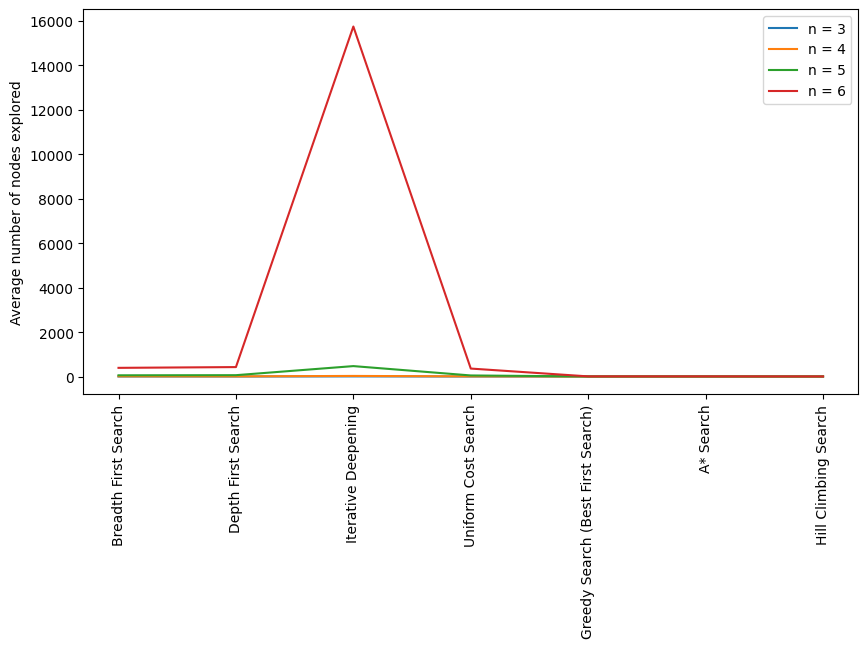

In [32]:
n = 3
fig = plt.figure(figsize=(10, 5))
names = list(results[0].keys())

for each in results:
    x = range(len(each))
    values = np.array(list(each.values())) / num_iters
    plt.plot(x, values, label=f'n = {n}')
    n += 1

plt.ylabel('Average number of nodes explored')
plt.xticks(x, names, rotation ='vertical')
plt.legend()
plt.show()
